## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

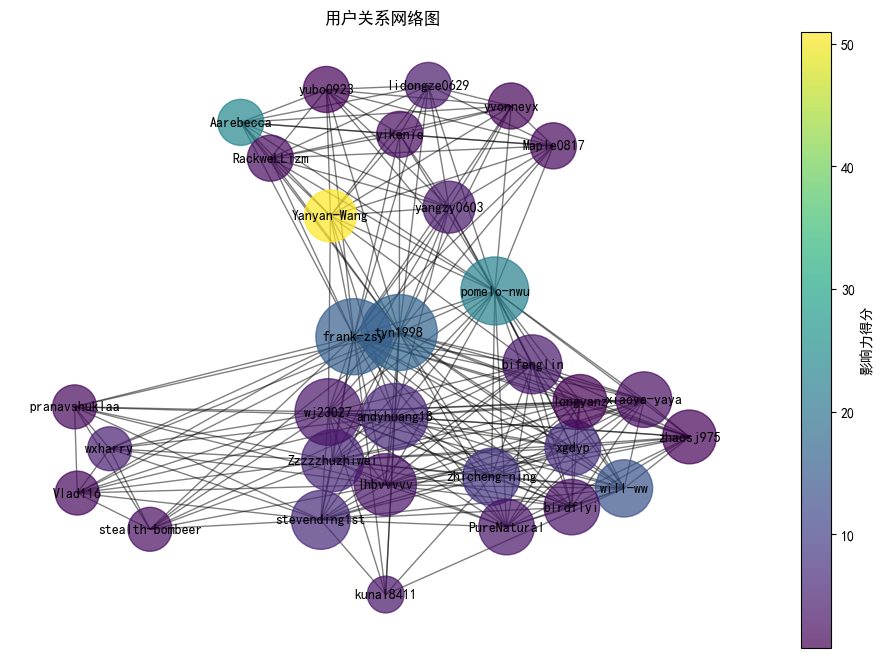

In [30]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm

# 设置全局字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为 SimHei
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为框的问题

with open('hw4_data.json', 'r') as file:
    data = json.load(file)

nodes = data.get("nodes",{})
edges = data.get("edges",{})

network = {}

for node in nodes:
    user = node[0]
    network[user] = []

for edge in edges:
    user1 , user2 , _ = edge
    network[user1].append(user2)
    network[user2].append(user1)

#1 社交网络构建与分析
with open('test_1.txt', 'w', encoding='utf-8') as f:
    for user, friends in network.items():
        # 格式化输出字符串
        line = f"{user} 的直接朋友有：{', '.join(friends)}\n"
        f.write(line)  # 写入文件

#2 统计与度中心性分析
friend_counts = {user: len(friends) for user, friends in network.items()}
sorted_friends = sorted(friend_counts.items(), key=lambda item: item[1], reverse=True)

sorted_nodes = sorted(nodes, key=lambda item: item[1], reverse=True)

combined_scores = {}
weight_influence = 0.5  # 影响力分数权重50%
weight_friends = 0.5    # 朋友数量权重50%

influence_scores = {user: score for user, score in nodes}
for user in influence_scores:
    influence_score = influence_scores.get(user, 0)
    friend_count = friend_counts.get(user, 0)
    combined_score = (weight_influence * influence_score) + (weight_friends * friend_count)
    combined_scores[user] = combined_score

sorted_combined_scores = sorted(combined_scores.items(), key=lambda item: item[1], reverse=True)

with open('test_2.txt', 'w', encoding='utf-8') as f:
    for user, count in sorted_friends[:5]:
        f.write(f"{user}: {count} 个朋友\n")  # 写入文件
    f.write("\n")
    for user, score in sorted_nodes[:5]:
        f.write(f"{user}:影响力分数{score}\n")
    f.write("\n")
    f.write("综合考虑影响力分数和朋友数量，最有影响力的前5个用户：\n")
    for user, score in sorted_combined_scores[:5]:
        f.write(f"{user}: 综合得分 {score:.2f}\n")

#3 推荐新朋友
target_user = "Yanyan-Wang"
direct_friends = set(network[target_user])
    
# 朋友的朋友集合，去除直接朋友和自己
friends_of_friends = []
for friend in direct_friends:
    friends_of_friends.extend([fof for fof in network[friend] if fof != target_user and fof not in direct_friends])
# 统计共同朋友数
recommendations_by_friends = Counter(friends_of_friends)
most_common_recommendation = recommendations_by_friends.most_common(5)  # 前5推荐

# 按连接强度推荐用户
# 找出所有与目标用户有关的边并排序
connections = [(user1, user2, strength) for user1, user2, strength in edges if user1 == target_user or user2 == target_user]
connections = [(user, strength) if user != target_user else (friend, strength) for user, friend, strength in connections]

# 按连接强度降序排序，推荐前5个用户
sorted_connections = sorted(connections, key=lambda x: x[1], reverse=True)[:5]

# 输出到文件
with open('test_3.txt', 'w', encoding='utf-8') as f:
    f.write("推荐朋友的朋友（共同朋友数）：\n")
    for user, count in most_common_recommendation:
        f.write(f"{user}: {count} 个共同朋友\n")
    
    f.write("\n按连接强度推荐的用户：\n")
    for user, strength in sorted_connections:
        f.write(f"{user}: 连接强度 {strength}\n")

#4  网络图的可视化

# 创建图
G = nx.Graph()

# 添加节点和影响力得分
influence_scores = {node[0]: node[1] for node in nodes}
for user in influence_scores:
    G.add_node(user, influence=influence_scores[user])

# 添加边
for edge in edges:
    user1, user2, _ = edge
    G.add_edge(user1, user2)

# 计算节点的度数和影响力得分
degrees = dict(G.degree())
node_sizes = [degrees[user] * 100 for user in G.nodes()]  # 节点大小
node_colors = [G.nodes[user]['influence'] for user in G.nodes()]  # 节点颜色

# 绘制网络图
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # 使用弹簧布局
sc = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

# 创建颜色条
cbar = plt.colorbar(sc)
cbar.set_label('影响力得分')


plt.title('用户关系网络图')
plt.axis('off')
plt.show()

test_1.txt中文件内容：

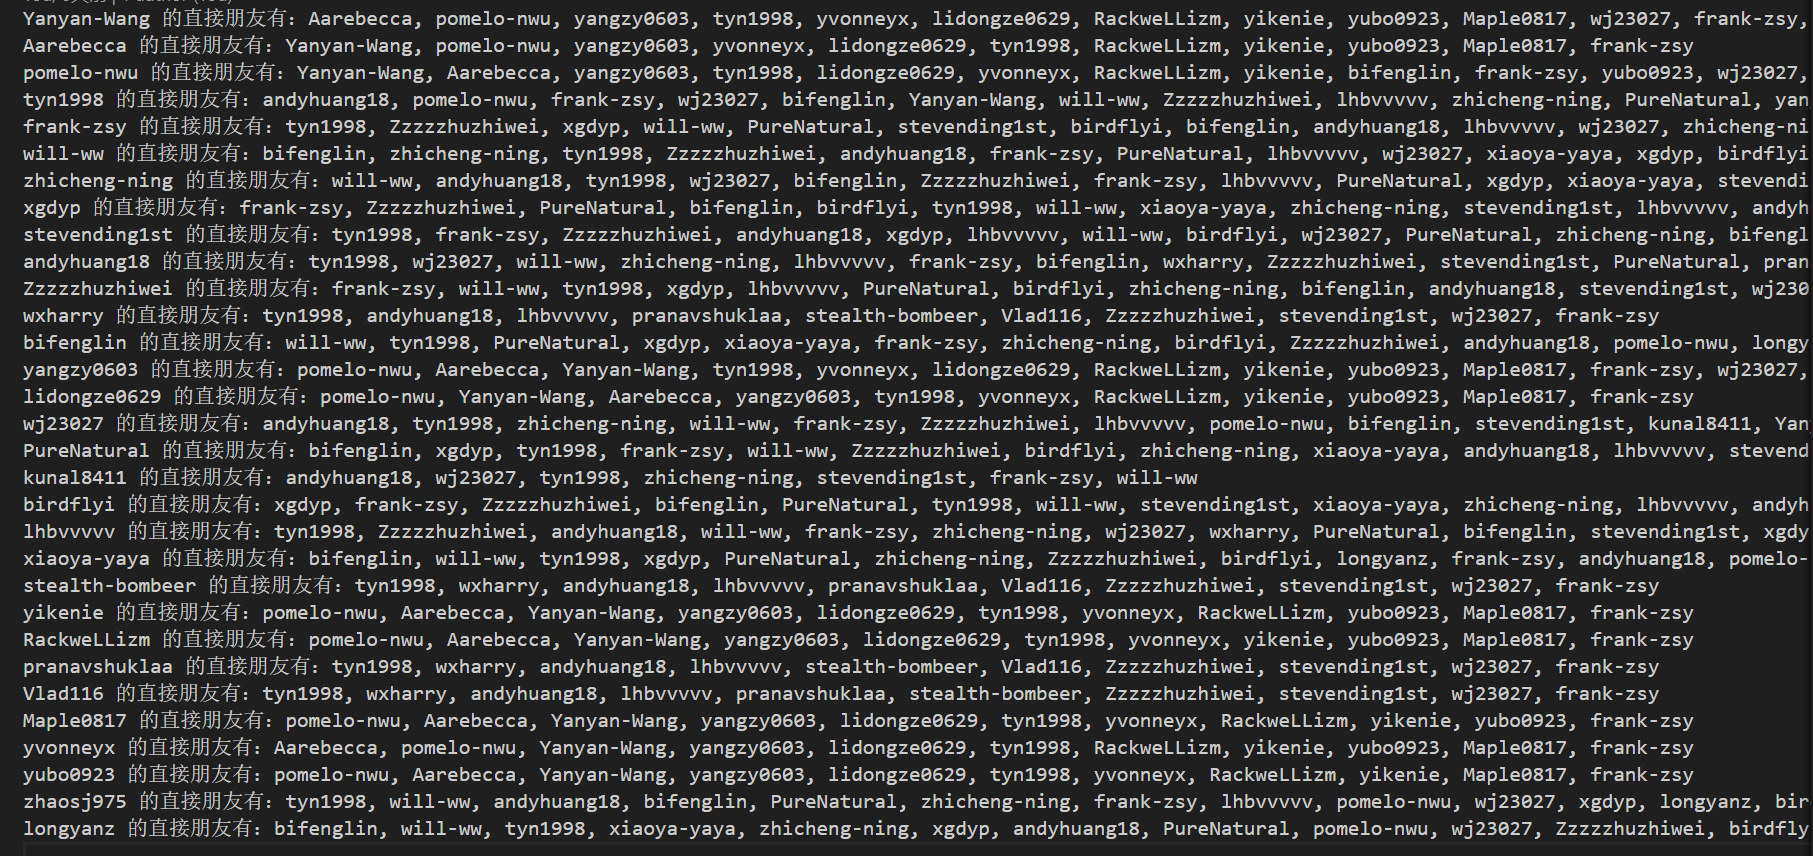

test_2.txt文件中内容

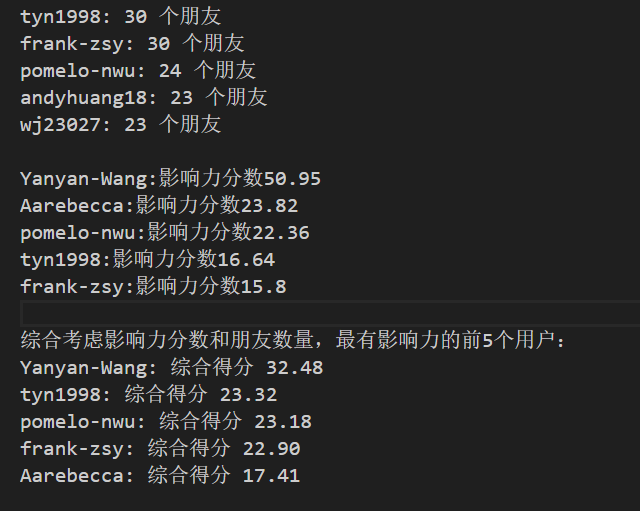

test_3.txt文件中内容

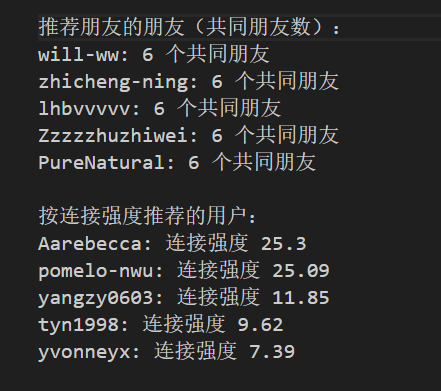